In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join, getsize
import json
import itertools
import seaborn as sns
import librosa

np.random.seed(37)
sns.set_style('whitegrid')

In [2]:
def get_state_mapping():
    with open('states.json', 'rb') as f:
        return json.load(f)
    
def get_codes_states_mapping():
    d = {}
    with open('codes-states.txt') as f:
        for line in f:
            tokens = [t.strip().lower() for t in line.split(',')]
            d[tokens[0]] = tokens[1]
    return d

def get_states():
    d = []
    with open('states.txt') as f:
        for line in f:
            d.append(line.strip().lower())
    return d
    
def load_json(fname):
    with open(fname, 'rb') as f:
        return json.load(f)['recordings']

def get_state(loc):
    state = loc.lower().strip()
    
    comma_index = loc.rfind(',')
    if comma_index > 0:
        state = loc[comma_index + 1:len(loc)].strip().lower()

    if state in valid_states:
        return state
    
    if state in codes_states_mapping:
        state = codes_states_mapping[state]
        return state

    return None
  
def get_lat_lng(v):
    if v is not None and len(v.strip()) > 0:
        try:
            return float(v)
        except:
            pass
    return None
    
def get_recording(data):
    mp3 = './mp3/{}.mp3'.format(data['id'])
    return {
        'id': data['id'],
        'state': get_state(data['loc']),
        'en': data['en'].strip().lower(),
        'sp': data['sp'].strip().lower(),
        'ssp': data['ssp'].strip().lower(),
        'gen': data['gen'].strip().lower(),
        'lat': get_lat_lng(data['lat']),
        'lng': get_lat_lng(data['lng']),
        'types': [t.strip() for t in data['type'].split(',')],
        'mp3': mp3,
        'mp3_size': getsize(mp3)
    }

def convert_rdict_to_df(data):
    def to_tuple(d):
        t = (d['id'], d['state'], d['en'], d['sp'], d['ssp'], d['gen'], d['lat'], d['lng'], d['types'], d['mp3'], d['mp3_size'])
        return t
    
    recordings = [to_tuple(d) for d in data]
    return pd.DataFrame(recordings, columns=['id', 'state', 'en', 'sp', 'ssp', 'gen', 'lat', 'lng', 'types', 'mp3', 'mp3_size'])

def get_recording_df():
    raw_data = [load_json('./json/{}'.format(f)) for f in listdir('./json') if isfile(join('./json', f))]
    print('{} total json files'.format(len(raw_data)))

    raw_data = list(itertools.chain(*raw_data))
    print('{} total recordings'.format(len(raw_data)))

    data = [get_recording(item) for item in raw_data]
    print('{} total recordings'.format(len(data)))

    recording_df = convert_rdict_to_df(data)
    print(recording_df.shape)
    return recording_df

In [3]:
codes_states_mapping = get_codes_states_mapping()
valid_states = get_states()
recording_df = get_recording_df()

83 total json files
41291 total recordings
41291 total recordings
(41291, 11)


In [4]:
recording_df.head(20)

,id,state,en,sp,ssp,gen,lat,lng,types,mp3,mp3_size
0,135670,tennessee,red-headed woodpecker,erythrocephalus,,melanerpes,35.3860,-84.1250,[song],./mp3/135670.mp3,296091
1,109610,tennessee,red-headed woodpecker,erythrocephalus,,melanerpes,35.3860,-84.1250,"[begging call, call, juvenile]",./mp3/109610.mp3,1261252
2,109609,tennessee,red-headed woodpecker,erythrocephalus,,melanerpes,35.3860,-84.1250,[call],./mp3/109609.mp3,388080
3,109608,tennessee,red-headed woodpecker,erythrocephalus,,melanerpes,35.3860,-84.1250,[call],./mp3/109608.mp3,452863
4,105601,None,red-headed woodpecker,erythrocephalus,,melanerpes,38.1400,-98.4790,[call],./mp3/105601.mp3,690469
5,97366,louisiana,red-headed woodpecker,erythrocephalus,,melanerpes,30.3850,-91.2060,[call],./mp3/97366.mp3,809001
6,97359,louisiana,red-headed woodpecker,erythrocephalus,,melanerpes,30.3850,-91.2060,"[song, drumming]",./mp3/97359.mp3,1049033
7,97353,louisiana,red-headed woodpecker,erythrocephalus,,melanerpes,30.3850,-91.2060,"[song, drum]",./mp3/97353.mp3,787433
8,97352,louisiana,red-headed woodpecker,erythrocephalus,,melanerpes,30.3850,-91.2060,"[song, call, drum]",./mp3/97352.mp3,2776478
9,87090,tennessee,red-headed woodpecker,erythrocephalus,,melanerpes,35.3860,-84.1250,[call],./mp3/87090.mp3,1432939


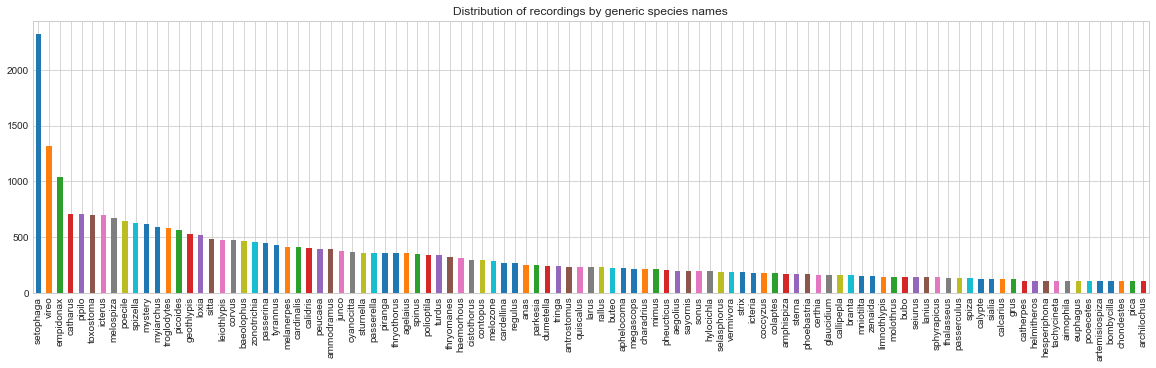

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Distribution of recordings by generic species names')
s = recording_df['gen'].value_counts()
s = s[s > 100]
s.plot(kind='bar', ax=ax)

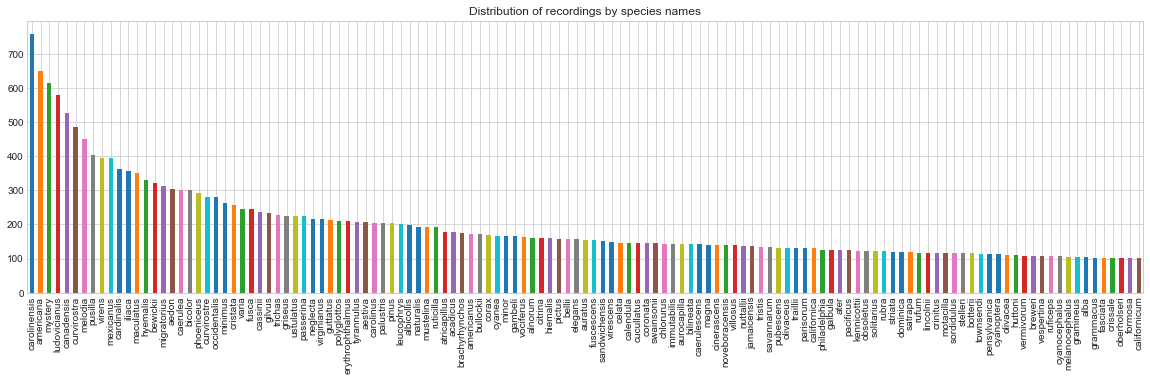

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Distribution of recordings by species names')
s = recording_df['sp'].value_counts()
s = s[s > 100]
s.plot(kind='bar', ax=ax)

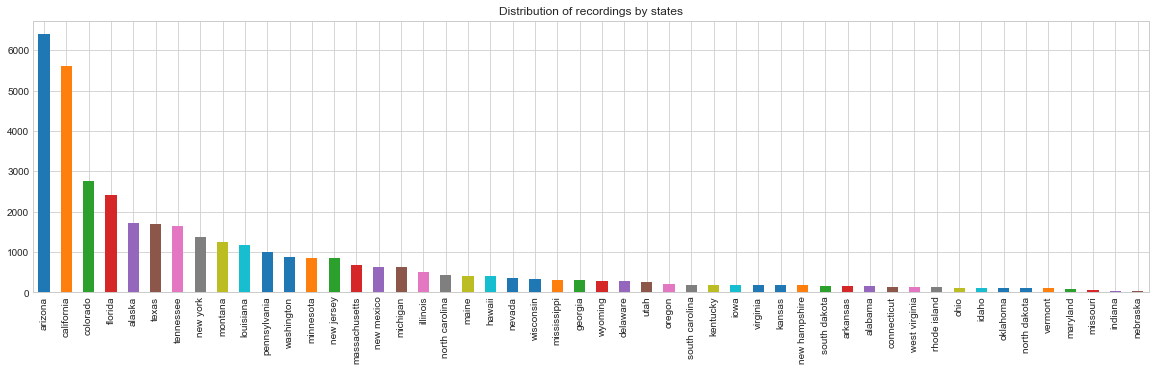

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Distribution of recordings by states')
s = recording_df['state'].value_counts()
s.plot(kind='bar', ax=ax)

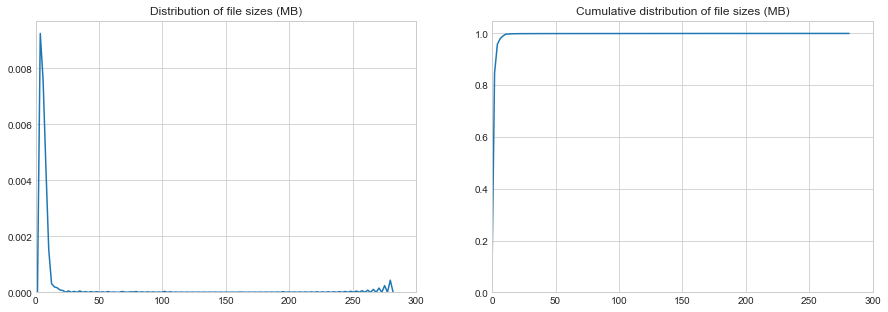

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Distribution of file sizes (MB)')
ax[1].set_title('Cumulative distribution of file sizes (MB)')
ax[0].set_xlim([0, 300])
ax[1].set_xlim([0, 300])
s = recording_df['mp3_size'] / float(1024*1024)
sns.kdeplot(s, bw=0.25, ax=ax[0], label='mp3 file size')
sns.kdeplot(s, cumulative=True, ax=ax[1], label='mp3 file size')
ax[0].legend_.remove()
ax[1].legend_.remove()

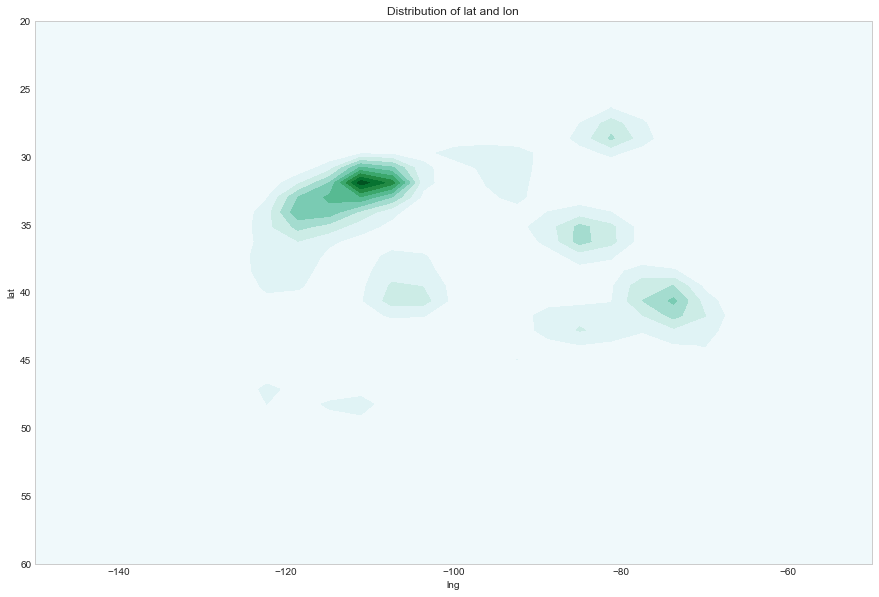

In [9]:
df = recording_df[np.isfinite(recording_df['lat']) & np.isfinite(recording_df['lng'])]
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_xlim([-150, -50])
ax.set_ylim([60, 20])
ax.set_title('Distribution of lat and lon')
sns.kdeplot(df['lng'], df['lat'], shade=True)

In [10]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft(y, t_n, ax):
    N = len(y)
    T = t_n / float(N)
    f_s = 1/T

    f_values, fft_values = get_fft_values(y, T, N, f_s)

    ax.plot(f_values, fft_values, linestyle='-', color='blue')
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('amplitude')
    ax.set_title("Frequency domain of the signal")
    
def sample_recording(n, df, max_size_mb=1.0):
    total = df.shape[0]
    samples = []
    while len(samples) < n:
        i = np.random.randint(0, total)
        if i in samples:
            pass
        r = df.loc[i]
        if r['mp3_size'] / float(1024 * 1024) <= max_size_mb:
            samples.append(i)
    return samples

0: ./mp3/317245.mp3 @ 0.833472251892
1: ./mp3/359187.mp3 @ 0.187436103821
2: ./mp3/187304.mp3 @ 0.595663070679
3: ./mp3/111817.mp3 @ 0.720639228821
4: ./mp3/388121.mp3 @ 0.880019187927
5: ./mp3/86144.mp3 @ 0.68657875061
6: ./mp3/109449.mp3 @ 0.0499725341797
7: ./mp3/100123.mp3 @ 0.870481491089
8: ./mp3/235106.mp3 @ 0.0683975219727
9: ./mp3/65306.mp3 @ 0.237760543823


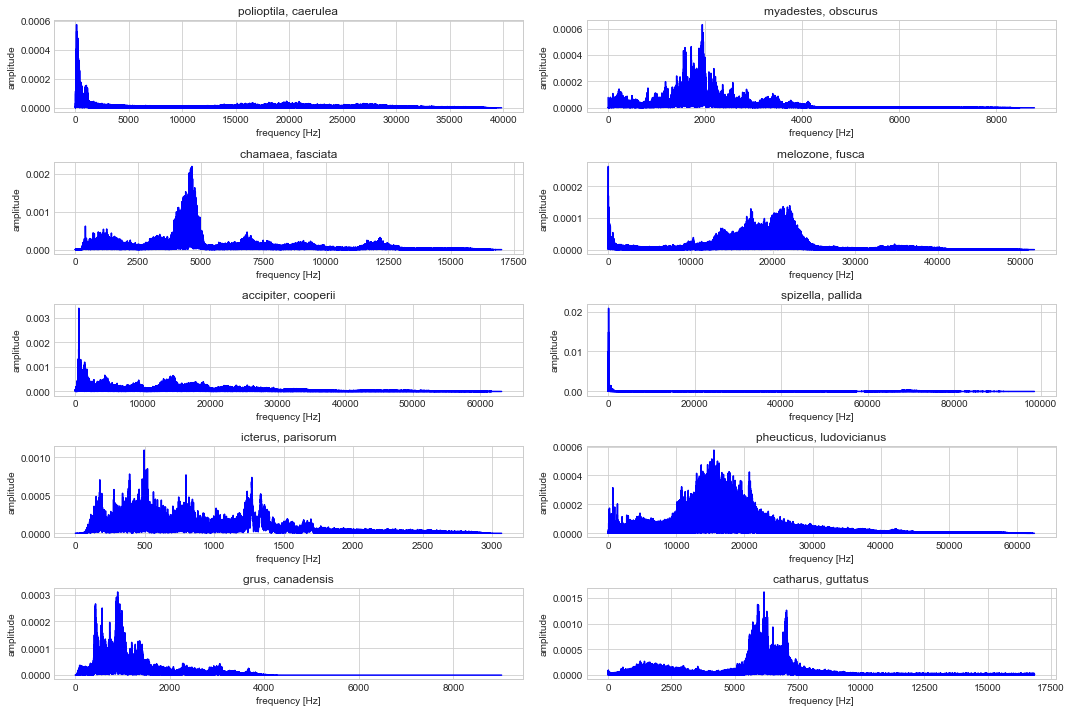

In [11]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10), sharex=False, sharey=False)
samples = sample_recording(10, recording_df)
for i, axis in enumerate(np.ravel(ax)):
    r = recording_df.loc[samples[i]]
    fname = r['mp3']
    fsize = r['mp3_size'] / float(1024*1024)
    gen = r['gen']
    sp = r['sp']
    title = '{}, {}'.format(gen, sp)
    print('{}: {} @ {}'.format(i, fname, fsize))
    y, sr = librosa.load(fname)
    plot_fft(y, 10, axis)
    axis.set_title(title)
plt.tight_layout()